In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Use it when using google collab to train, saves model to drive automatically once done (Run all cells)
# from google.colab import drive
# drive.mount('/content/drive')

### When using Google Colab

#### 1. Inserting training data (matrix) to colab
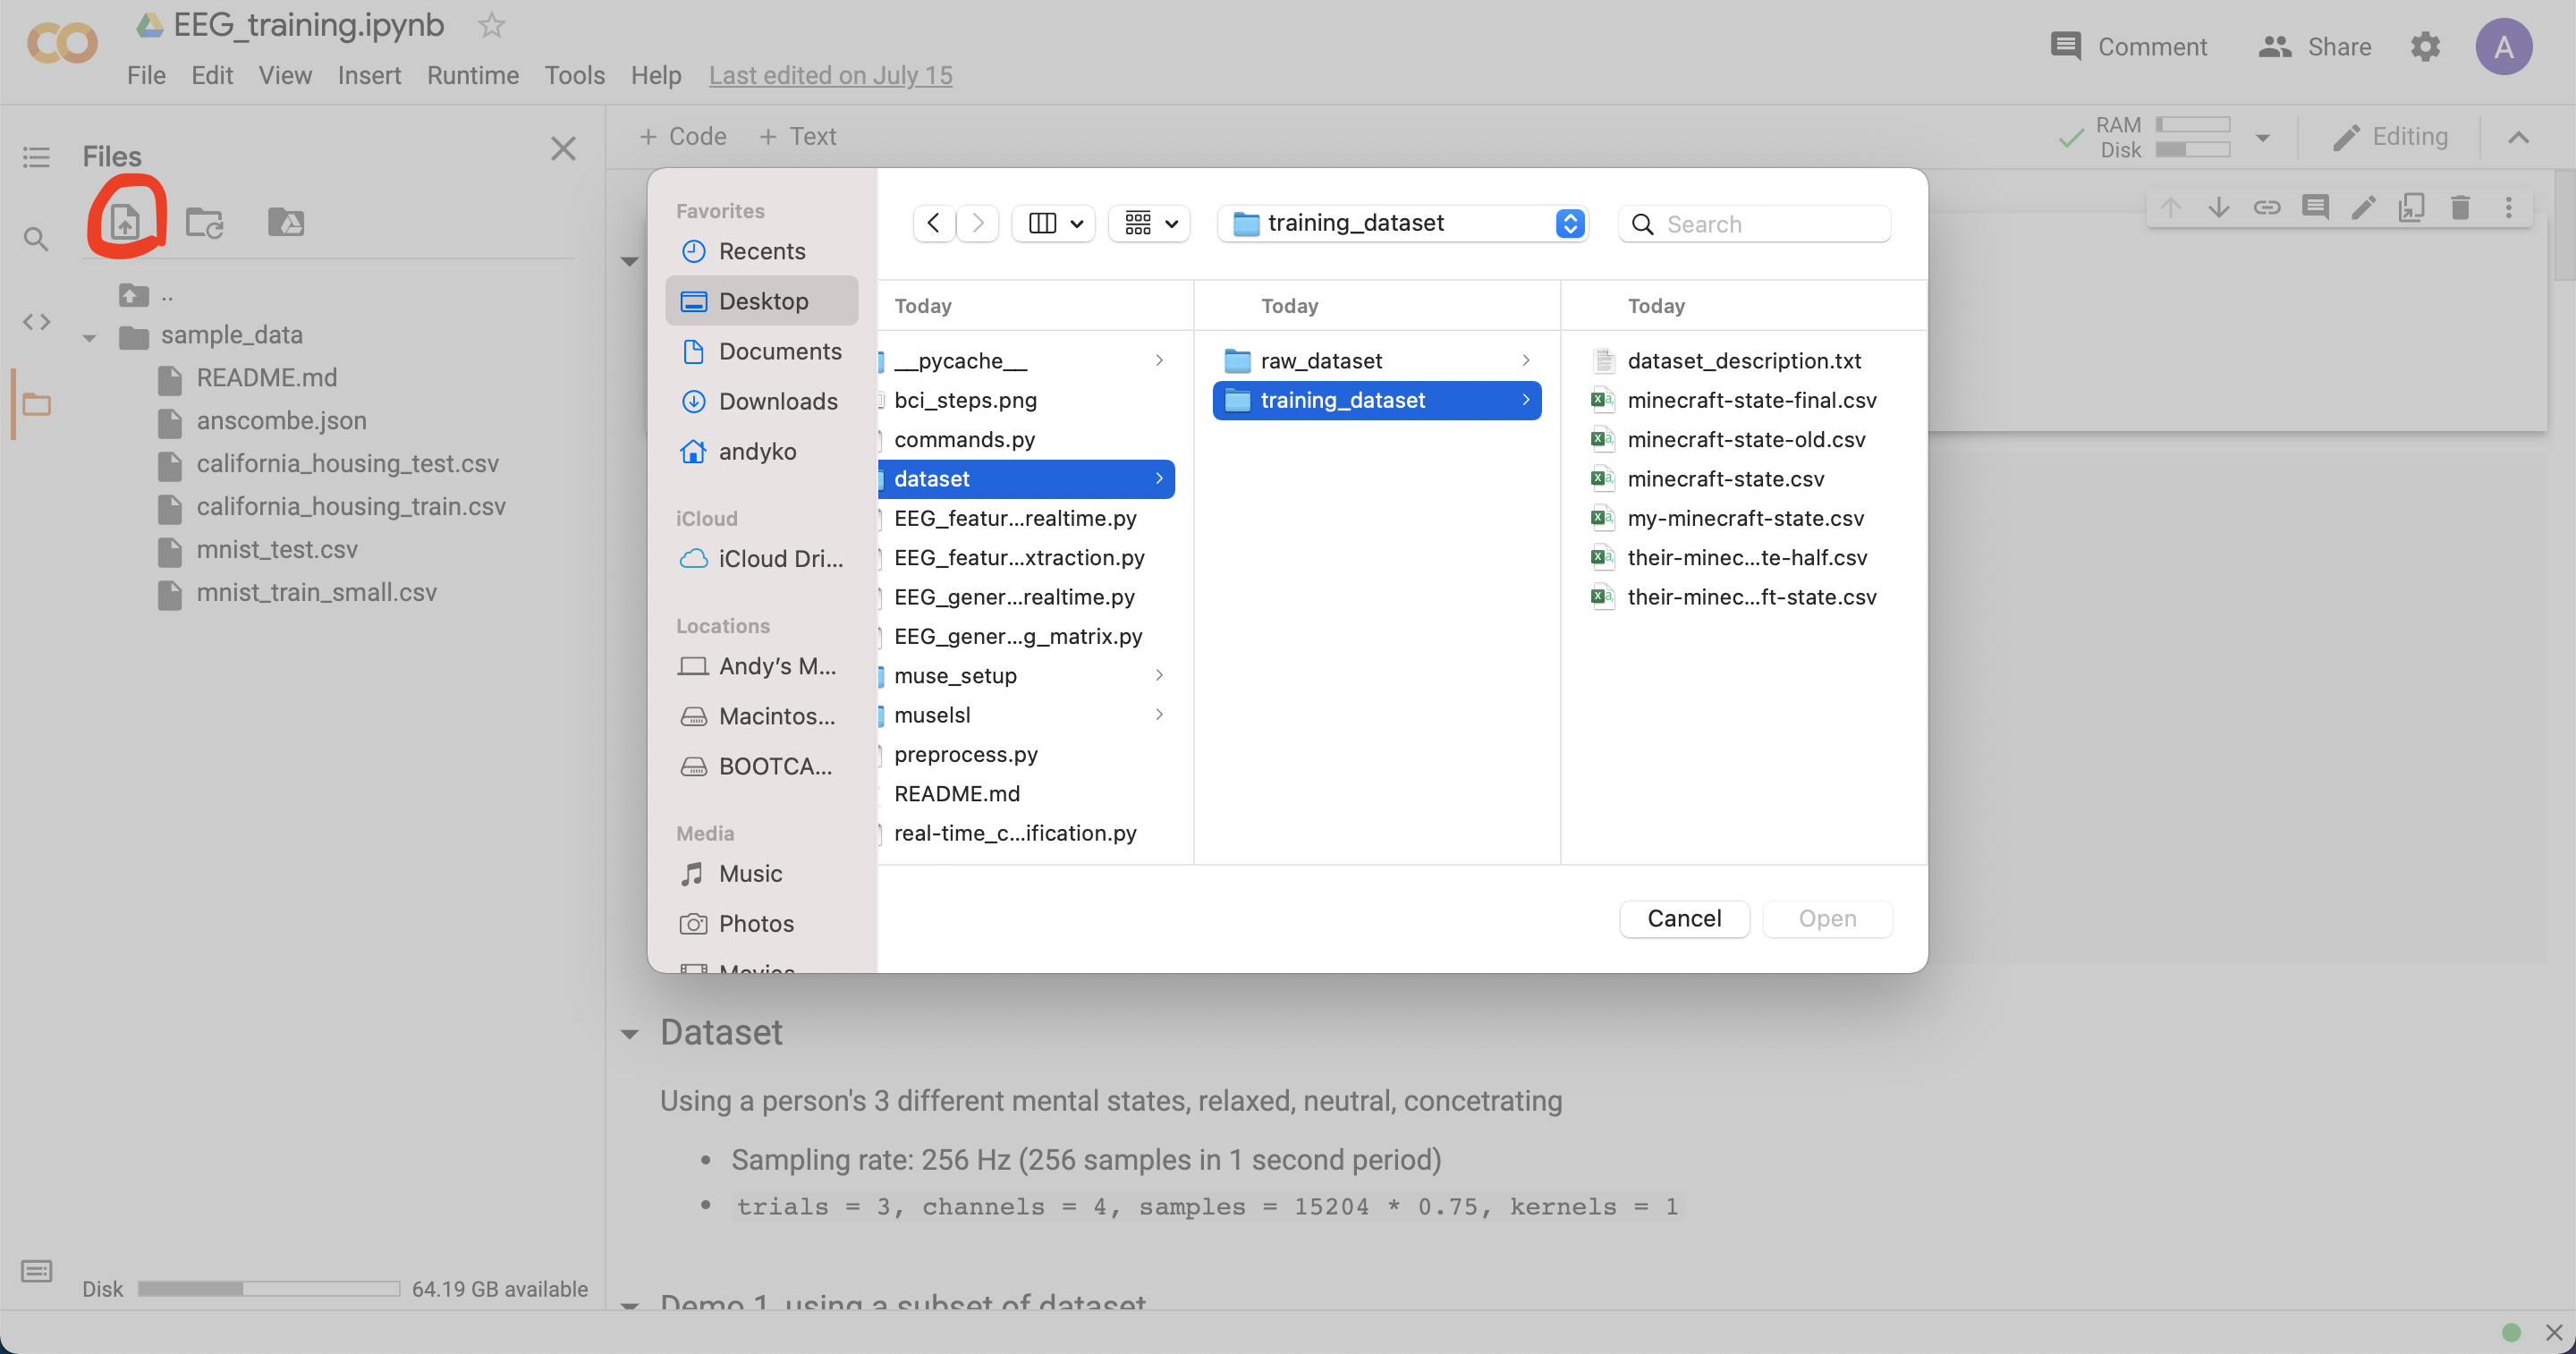
<!-- <img src="imgs/dataset_insertion_colab.png"> -->

#### 2. Use provided GPU from colab
<!-- ![change_runtime_colab.png](attachment:change_runtime_colab.png) -->
<img src="imgs/change_runtime_colab.png">
Select "GPU" from Hardware accelerator
<img src="imgs/change_runtime_colab2.png" style="width:300px;height:200px">

In [3]:
# Keep the original path
org_cwd = os.getcwd()
print(org_cwd)
os.chdir('..')
print(os.getcwd())

/Users/andyko/Desktop/EEG_Classification/trainings
/Users/andyko/Desktop/EEG_Classification


In [4]:
# used the newly collected dataset of me (8/5) as subjectc-1 in minecraft-state folder
filename = 'their-minecraft-state'

outfile_path = os.getcwd() + '/dataset/training_dataset/' + filename + '.csv'

df = pd.read_csv(outfile_path)
print(df['Label'].value_counts())
print('df shape: {}'.format(df.shape))
df

0.0    216
2.0    216
1.0    216
Name: Label, dtype: int64
df shape: (648, 989)


,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,-37.277174,-43.030969,-36.447629,-35.684127,-15.007371,-1.645471,1.909458,-10.250657,-30.173763,-39.916087,...,0.013639,0.014673,0.016323,0.010981,0.002892,0.007469,0.023877,0.006166,0.010377,1.0
1,-36.642161,-39.056745,-26.281063,-40.255439,-2.241697,-12.631036,-5.477559,12.076263,-47.894014,-25.070973,...,0.017032,0.020773,0.008015,0.026345,0.018926,0.030342,0.020967,0.011433,0.032048,0.0
2,-40.229463,-63.108915,-67.984208,-72.194004,-0.341225,6.349947,-4.684524,22.157984,-36.495415,-65.410248,...,0.009989,0.024158,0.013508,0.020656,0.015429,0.009691,0.001305,0.013673,0.018705,0.0
3,-37.450039,-39.011419,-35.203550,-37.985609,-0.184593,-2.599875,-2.107257,-4.667253,-39.540556,-38.890191,...,0.008634,0.020171,0.018735,0.008070,0.022522,0.025040,0.035756,0.017217,0.012021,1.0
4,-31.236584,-40.498620,-30.246655,-29.695176,-7.886850,7.877147,-1.172290,-5.199914,-26.230491,-48.784865,...,0.013128,0.017328,0.027893,0.026951,0.022054,0.015784,0.009199,0.018158,0.009810,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,-39.242498,-45.737576,-34.980090,-39.244412,18.515956,9.856033,-0.110216,16.329277,-69.083018,-57.004967,...,0.050628,0.051594,0.025037,0.012807,0.023609,0.005483,0.006116,0.007702,0.005607,1.0
644,-24.606315,-33.268484,-29.241134,-28.847063,-5.959537,4.258647,-0.051484,-4.038128,-19.911037,-35.485516,...,0.002609,0.009808,0.005097,0.003745,0.004550,0.003305,0.002596,0.002048,0.003165,0.0
645,-26.876310,-35.773260,-25.528787,-26.643508,-0.760498,-0.923390,-3.411059,0.451387,-23.806253,-34.942615,...,0.010003,0.015004,0.014943,0.014015,0.009935,0.010050,0.001803,0.008293,0.007048,0.0
646,-25.517000,-37.471278,-27.008659,-26.074239,1.494077,-2.046352,0.591996,-0.201772,-19.449005,-35.719971,...,0.034118,0.019674,0.026596,0.030456,0.007588,0.017037,0.004276,0.013569,0.036147,2.0


In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = preprocess_inputs(df)

In [40]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

rnn = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)

dense = tf.keras.layers.Dense(16, activation='relu')(rnn)
flatten = tf.keras.layers.Flatten()(dense)

# flatten = tf.keras.layers.Flatten()(rnn)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 988)]             0         
_________________________________________________________________
tf.expand_dims_8 (TFOpLambda (None, 988, 1)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 988, 256)          264192    
_________________________________________________________________
dense_16 (Dense)             (None, 988, 16)           4112      
_________________________________________________________________
flatten_8 (Flatten)          (None, 15808)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 47427     
Total params: 315,731
Trainable params: 315,731
Non-trainable params: 0
_____________________________________________________

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100
)
model.save(os.getcwd() + '/gdrive/My Drive/their-lstm_256_dense_16_100.h5')

Epoch 1/100
15/15 [==============================] - 47s 3s/step - loss: 0.8927 - accuracy: 0.5850 - val_loss: 0.6104 - val_accuracy: 0.7077
Epoch 2/100
15/15 [==============================] - 44s 3s/step - loss: 0.5262 - accuracy: 0.7373 - val_loss: 0.4152 - val_accuracy: 0.8308
Epoch 3/100
15/15 [==============================] - 44s 3s/step - loss: 0.3019 - accuracy: 0.8675 - val_loss: 0.4978 - val_accuracy: 0.7487
Epoch 4/100
15/15 [==============================] - 45s 3s/step - loss: 0.1894 - accuracy: 0.9227 - val_loss: 0.2436 - val_accuracy: 0.8974
Epoch 5/100
15/15 [==============================] - 45s 3s/step - loss: 0.0879 - accuracy: 0.9801 - val_loss: 0.2219 - val_accuracy: 0.9026
Epoch 6/100
15/15 [==============================] - 45s 3s/step - loss: 0.0787 - accuracy: 0.9691 - val_loss: 0.2230 - val_accuracy: 0.8974
Epoch 7/100
15/15 [==============================] - 45s 3s/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.1441 - val_accuracy: 0.9538
Epoch 8/100
1

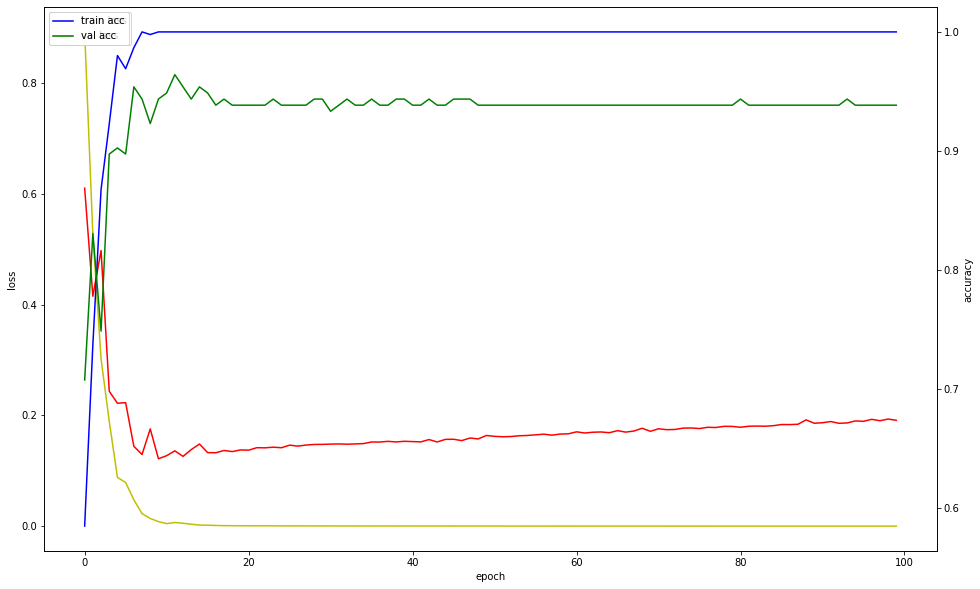

In [42]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

Test Accuracy: 93.846%


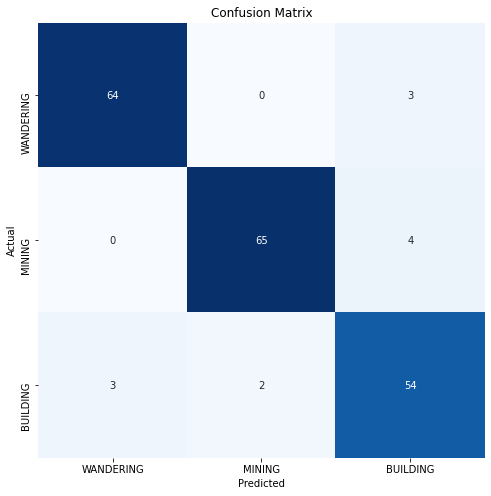

Classification Report:
----------------------
               precision    recall  f1-score   support

   WANDERING       0.96      0.96      0.96        67
      MINING       0.97      0.94      0.96        69
    BUILDING       0.89      0.92      0.90        59

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195



In [43]:
# gru 256 no dense
model_acc = model.evaluate(X_val, y_val, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

label_mapping = {'WANDERING': 0, 'MINING': 1, 'BUILDING': 2}
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_val))))

cm = confusion_matrix(y_val, y_pred)
clr = classification_report(y_val, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)